In [1]:
import yfinance as yf
from sklearn import preprocessing
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
company="AAPL"
interval = 60

In [3]:
stocks = yf.Ticker(company)
df=stocks.history(start='2001-01-19', end='2022-05-13', actions=False)

In [4]:
df.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2001-01-18,0.272711,0.287064,0.269840,0.286107,1227010400
2001-01-19,0.297590,0.299503,0.286107,0.298547,776664000
2001-01-22,0.291849,0.300460,0.282280,0.294719,519327200
2001-01-23,0.295676,0.320555,0.291849,0.313857,879530400
2001-01-24,0.315771,0.316728,0.299503,0.313857,717091200


In [5]:
df.shape

(5254, 5)

In [6]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

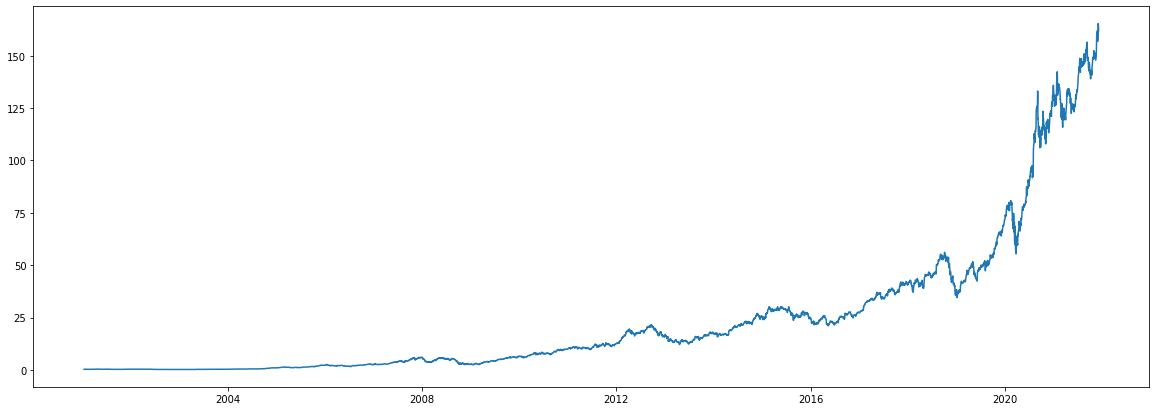

In [7]:
plt.figure(figsize=(20,7))
plt.plot(df.index,df['Close'])

In [8]:
df=df.drop(['Open','High','Volume','Low'],axis=1)
data=df.values
train_len=math.ceil(len(data)*0.95)

In [9]:
data[0:5]

array([[0.28610706],
       [0.29854658],
       [0.29471931],
       [0.31385657],
       [0.31385657]])

In [10]:
train_len

4992

In [11]:
min_max_scalar=preprocessing.MinMaxScaler()
scaled_data=min_max_scalar.fit_transform(data)
train_data=scaled_data[0:train_len,:]

In [12]:
train_data[0:5]

array([[0.00051629],
       [0.00059163],
       [0.00056845],
       [0.00068436],
       [0.00068436]])

In [13]:
x_train=[]
y_train=[]
for i in range(interval,len(train_data)):
    x_train.append(train_data[i-interval:i,0])
    y_train.append(train_data[i,0])

In [14]:
x_train[0:2]

[array([0.00051629, 0.00059163, 0.00056845, 0.00068436, 0.00068436,
        0.00063221, 0.00059743, 0.00079449, 0.00080028, 0.00078869,
        0.00074232, 0.00069596, 0.00065539, 0.00074232, 0.00070755,
        0.00070755, 0.00055686, 0.00060902, 0.00055686, 0.00059163,
        0.0006438 , 0.00054527, 0.00048151, 0.00053368, 0.00052788,
        0.00052788, 0.00059163, 0.00058004, 0.00047572, 0.00052208,
        0.00056845, 0.00067277, 0.0007771 , 0.00075391, 0.00071335,
        0.00066118, 0.00051049, 0.00059743, 0.00067857, 0.00060902,
        0.00060322, 0.00069016, 0.00060902, 0.00064959, 0.00078869,
        0.0009162 , 0.00080307, 0.00090414, 0.00083923, 0.00087261,
        0.00082996, 0.00078545, 0.00066026, 0.00059163, 0.00071868,
        0.00069271, 0.00068808, 0.00082717, 0.00080492, 0.00086241]),
 array([0.00059163, 0.00056845, 0.00068436, 0.00068436, 0.00063221,
        0.00059743, 0.00079449, 0.00080028, 0.00078869, 0.00074232,
        0.00069596, 0.00065539, 0.00074232, 0.

In [15]:
y_train[0:2]

[0.0007715341846565814, 0.0006750940136156834]

In [16]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [17]:
x_train[0:2]

array([[0.00051629, 0.00059163, 0.00056845, 0.00068436, 0.00068436,
        0.00063221, 0.00059743, 0.00079449, 0.00080028, 0.00078869,
        0.00074232, 0.00069596, 0.00065539, 0.00074232, 0.00070755,
        0.00070755, 0.00055686, 0.00060902, 0.00055686, 0.00059163,
        0.0006438 , 0.00054527, 0.00048151, 0.00053368, 0.00052788,
        0.00052788, 0.00059163, 0.00058004, 0.00047572, 0.00052208,
        0.00056845, 0.00067277, 0.0007771 , 0.00075391, 0.00071335,
        0.00066118, 0.00051049, 0.00059743, 0.00067857, 0.00060902,
        0.00060322, 0.00069016, 0.00060902, 0.00064959, 0.00078869,
        0.0009162 , 0.00080307, 0.00090414, 0.00083923, 0.00087261,
        0.00082996, 0.00078545, 0.00066026, 0.00059163, 0.00071868,
        0.00069271, 0.00068808, 0.00082717, 0.00080492, 0.00086241],
       [0.00059163, 0.00056845, 0.00068436, 0.00068436, 0.00063221,
        0.00059743, 0.00079449, 0.00080028, 0.00078869, 0.00074232,
        0.00069596, 0.00065539, 0.00074232, 0.0

In [18]:
x_train.shape

(4932, 60)

In [19]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(4932, 60, 1)


In [20]:
x_train[0:2]

array([[[0.00051629],
        [0.00059163],
        [0.00056845],
        [0.00068436],
        [0.00068436],
        [0.00063221],
        [0.00059743],
        [0.00079449],
        [0.00080028],
        [0.00078869],
        [0.00074232],
        [0.00069596],
        [0.00065539],
        [0.00074232],
        [0.00070755],
        [0.00070755],
        [0.00055686],
        [0.00060902],
        [0.00055686],
        [0.00059163],
        [0.0006438 ],
        [0.00054527],
        [0.00048151],
        [0.00053368],
        [0.00052788],
        [0.00052788],
        [0.00059163],
        [0.00058004],
        [0.00047572],
        [0.00052208],
        [0.00056845],
        [0.00067277],
        [0.0007771 ],
        [0.00075391],
        [0.00071335],
        [0.00066118],
        [0.00051049],
        [0.00059743],
        [0.00067857],
        [0.00060902],
        [0.00060322],
        [0.00069016],
        [0.00060902],
        [0.00064959],
        [0.00078869],
        [0

In [21]:
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate,Bidirectional
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,LSTM
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
import numpy as np
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

In [54]:
stop = EarlyStopping(
    monitor='val_loss', 
    mode='min',
    patience=20,verbose=1
)

checkpoint= ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.00001,verbose=1)

In [55]:
model=Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=100))
model.add(Dense(100))
model.add(Dense(1))

In [56]:
adam = optimizers.Adam(lr=0.0005)
model.compile(optimizer=adam, loss='mse')
history=model.fit(x=x_train, y=y_train, batch_size=256, epochs=100, shuffle=True, validation_split=0.2, callbacks = [stop, checkpoint,reduce_lr])

Epoch 1/100
16/16 [==============================] - 20s 1s/step - loss: 0.0027 - val_loss: 0.0081
Epoch 2/100
16/16 [==============================] - 13s 808ms/step - loss: 1.8545e-04 - val_loss: 3.9996e-04
Epoch 3/100
16/16 [==============================] - 14s 869ms/step - loss: 2.9043e-05 - val_loss: 6.4075e-04
Epoch 4/100
16/16 [==============================] - 12s 748ms/step - loss: 1.3751e-05 - val_loss: 3.5654e-04
Epoch 5/100
16/16 [==============================] - 14s 856ms/step - loss: 9.7312e-06 - val_loss: 3.9756e-04
Epoch 6/100
16/16 [==============================] - 13s 812ms/step - loss: 8.9070e-06 - val_loss: 3.9200e-04
Epoch 7/100
16/16 [==============================] - 13s 799ms/step - loss: 8.6045e-06 - val_loss: 3.9457e-04

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 8/100
16/16 [==============================] - 12s 749ms/step - loss: 8.1438e-06 - val_loss: 3.9214e-04
Epoch 9/100
16/16 [==============================

In [57]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 200)           161600    
_________________________________________________________________
lstm_9 (LSTM)                (None, 100)               120400    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 292,201
Trainable params: 292,201
Non-trainable params: 0
_________________________________________________________________


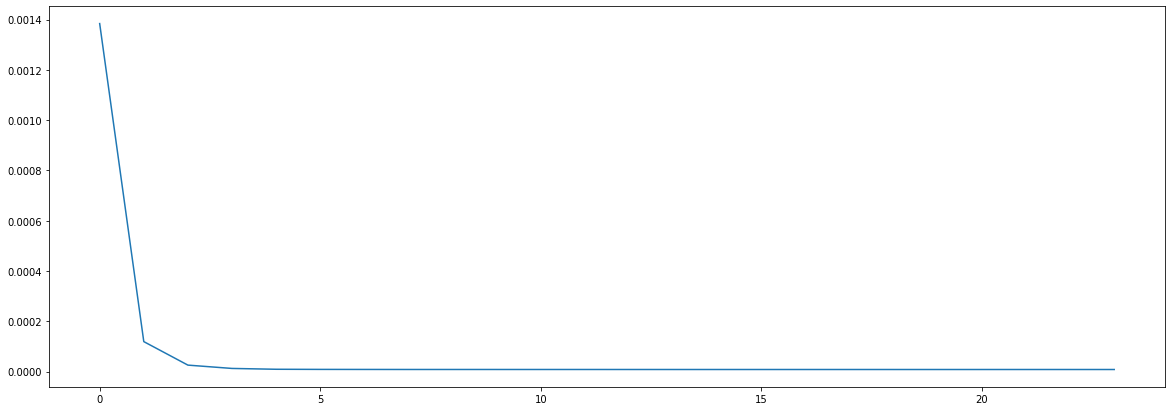

In [58]:
plt.figure(figsize=(20,7))
plt.plot(history.history['loss'])

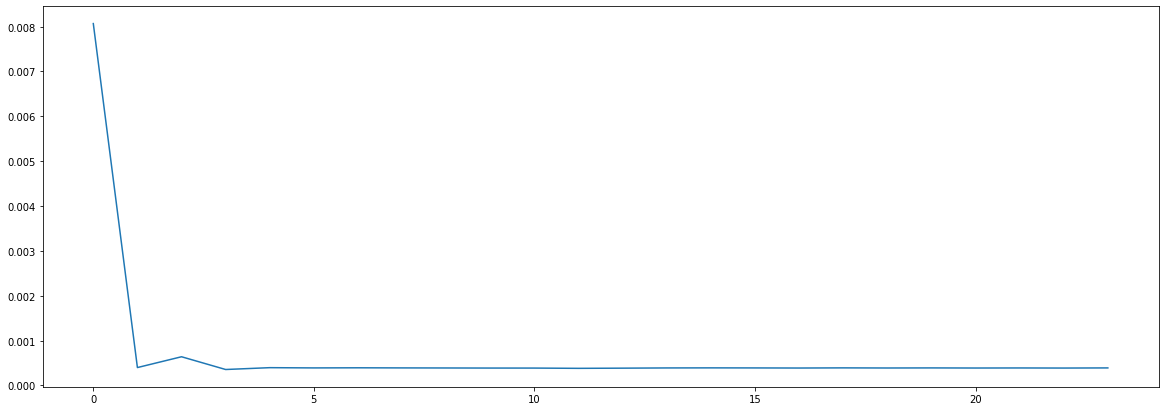

In [59]:
plt.figure(figsize=(20,7))
plt.plot(history.history['val_loss'])

In [60]:
test_data=scaled_data[train_len-interval:,:]
x_test=[]
y_test=scaled_data[train_len:,:]
for i in range(interval,len(test_data)):
    x_test.append(test_data[i-interval:i,0])

In [61]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [62]:
x_test[1]

array([[0.7500295 ],
       [0.74881249],
       [0.77424757],
       [0.80513639],
       [0.78842991],
       [0.72521023],
       [0.72569101],
       [0.67677381],
       [0.70381653],
       [0.68080008],
       [0.67184596],
       [0.69203785],
       [0.69311961],
       [0.67262725],
       [0.66187021],
       [0.64083695],
       [0.66030781],
       [0.67070418],
       [0.64251977],
       [0.64913007],
       [0.67352859],
       [0.68963409],
       [0.68440578],
       [0.69474212],
       [0.70063143],
       [0.67797562],
       [0.69888868],
       [0.67881698],
       [0.69035522],
       [0.68969417],
       [0.70171314],
       [0.74636368],
       [0.72653228],
       [0.72707322],
       [0.72418864],
       [0.71403262],
       [0.69576384],
       [0.70495826],
       [0.70111226],
       [0.69438158],
       [0.69011487],
       [0.69017499],
       [0.69948965],
       [0.66703845],
       [0.69179751],
       [0.65297621],
       [0.65243536],
       [0.662

In [63]:
y_test[1]

array([0.70515322])

In [64]:
model.load_weights("./")


In [65]:
evaluation = model.evaluate(x_test, y_test)
print(evaluation)

9/9 [==============================] - 2s 68ms/step - loss: 0.0015
0.0014869468286633492


In [66]:
predictions=model.predict(x_test)
len(predictions[0])

1

In [67]:
predictions=min_max_scalar.inverse_transform(predictions)
predictions[0:5]

array([[114.58283],
       [114.92361],
       [115.1777 ],
       [115.25297],
       [115.21936]], dtype=float32)

In [68]:
min_max_scalar.inverse_transform(y_test[0:5])

array([[117.91309357],
       [116.6210556 ],
       [113.15244293],
       [114.46434784],
       [115.31907654]])

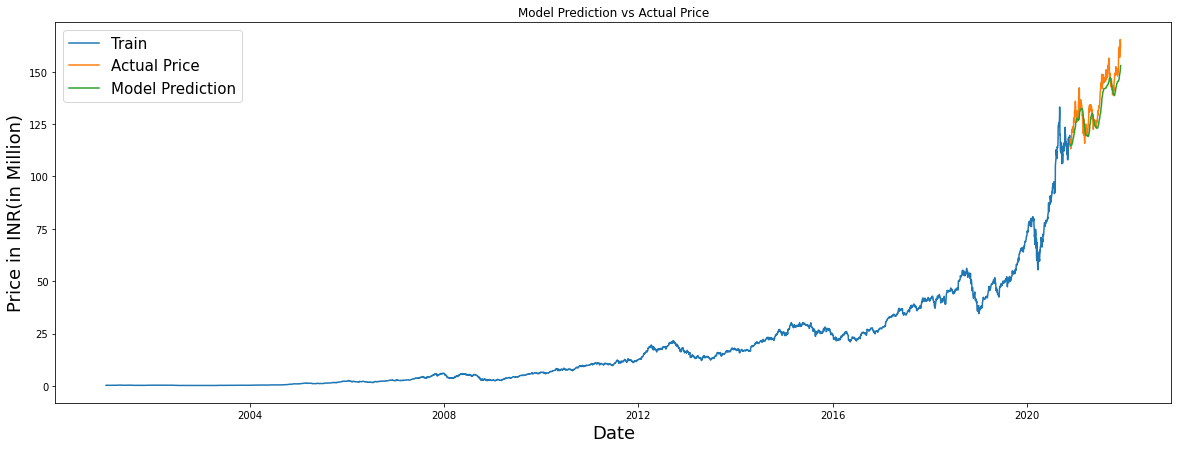

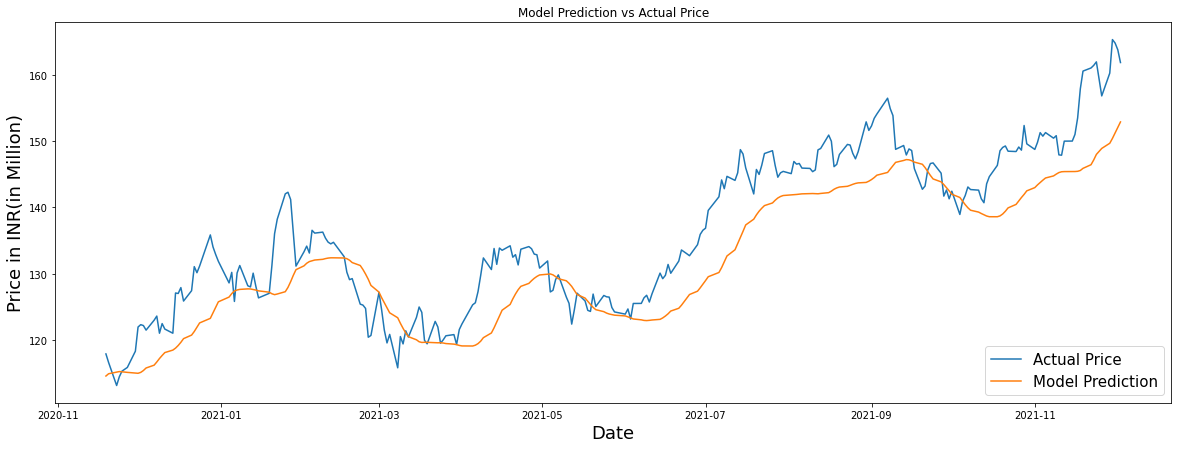

In [70]:
train_data=df[0:train_len]
valid_data=df[train_len:]
valid_data['predictions']=predictions
plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Train','Actual Price','Model Prediction'],loc='upper left',fontsize=15)
plt.show()
plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
# plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()